# Course - Unsupervised Learning 

###### Author: Sana Rasheed
###### Student: Rashida Parveen
###### Submission_Date:Aug 15, 2021
##### NOTE: 
1. Your code MUST execute without any errors. 
2. You can add more lines in your code as required.

## Section 1: Clustering: K-mean Clustering

### Question 1 
**The dataset is loaded for you. Perform the following tasks:**  
1. The dataset contains milk composition from different mammals. You are required to cluster the observations using K mean clustering.  
2. Plot out the distributions (histogram) of each of the variables (columns) and see how they behave.  
3. Use k=3, 5, 10, 15, 20. Plot the sum of squares values as a chart and select the appropriate value of K. 

In [1]:
#install.packages("cluster.datasets")
library(cluster.datasets)
data(all.mammals.milk.1956)
head(all.mammals.milk.1956)

name,water,protein,fat,lactose,ash
Horse,90.1,2.6,1.0,6.9,0.35
Orangutan,88.5,1.4,3.5,6.0,0.24
Monkey,88.4,2.2,2.7,6.4,0.18
Donkey,90.3,1.7,1.4,6.2,0.40
Hippo,90.4,0.6,4.5,4.4,0.10
Camel,87.7,3.5,3.4,4.8,0.71


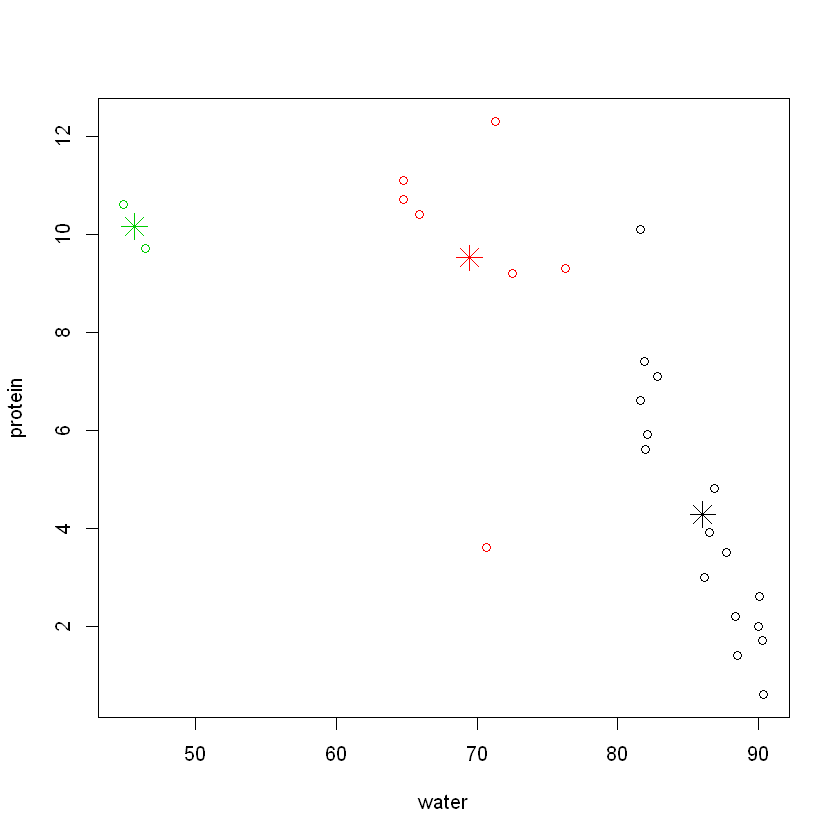

In [13]:
#1.The dataset contains milk composition from different mammals.
#You are required to cluster the observations using K mean clustering.
data <- (all.mammals.milk.1956)
data <- na.omit(data)
data$name <- NULL
kc <- kmeans(data,3)#from stats package
plot(data[c("water","protein")],col = kc$cluster)
#ploting centers
points(kc$centers[,c("water","protein")],col = 1:3,pch =8, cex =2)

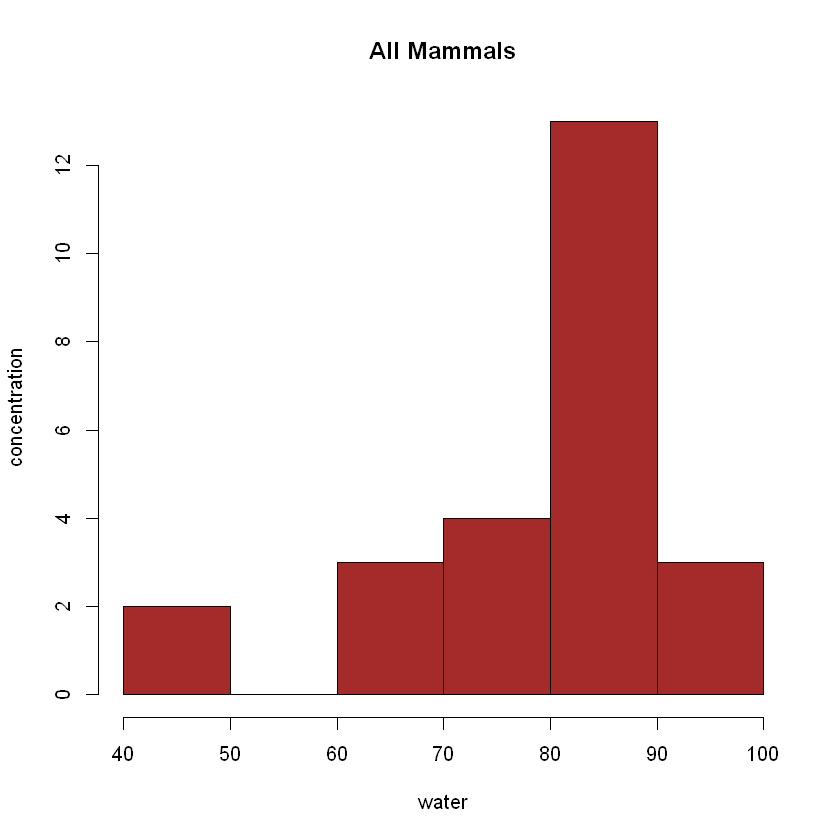

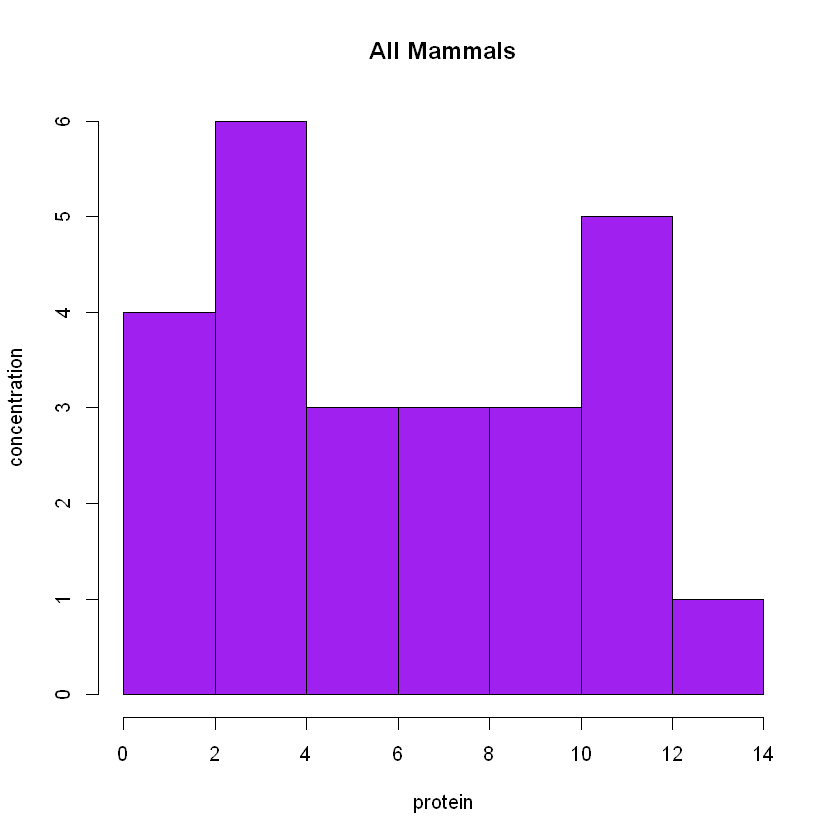

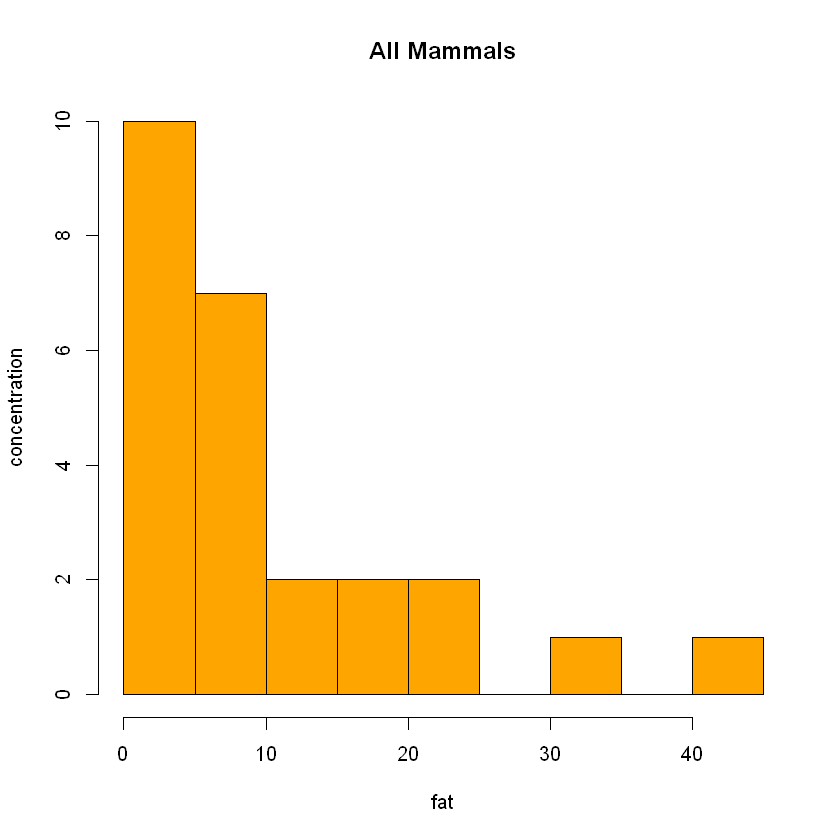

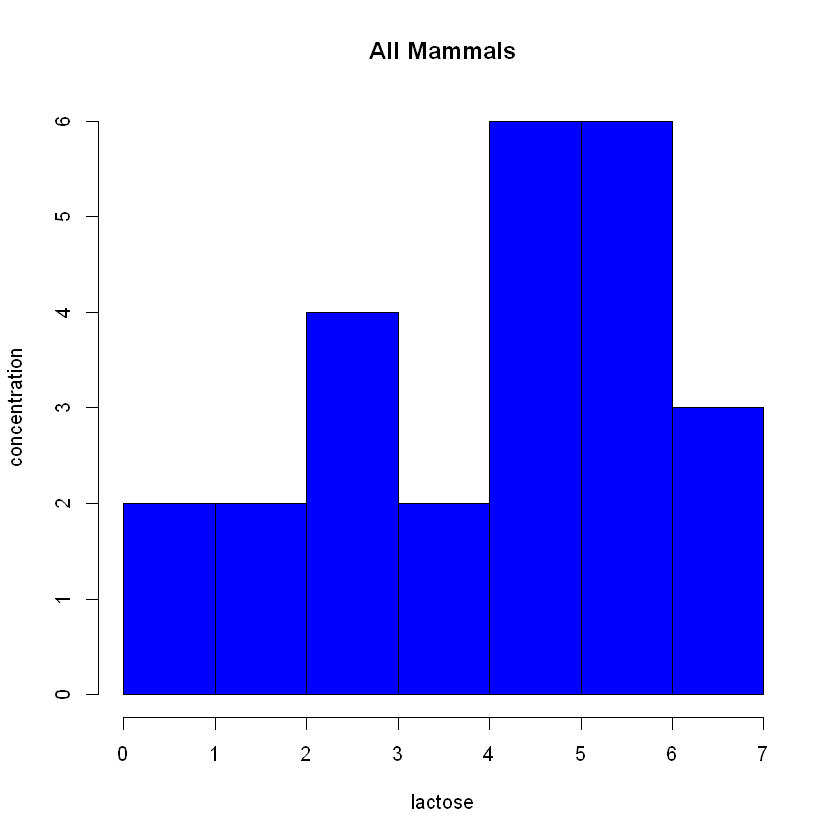

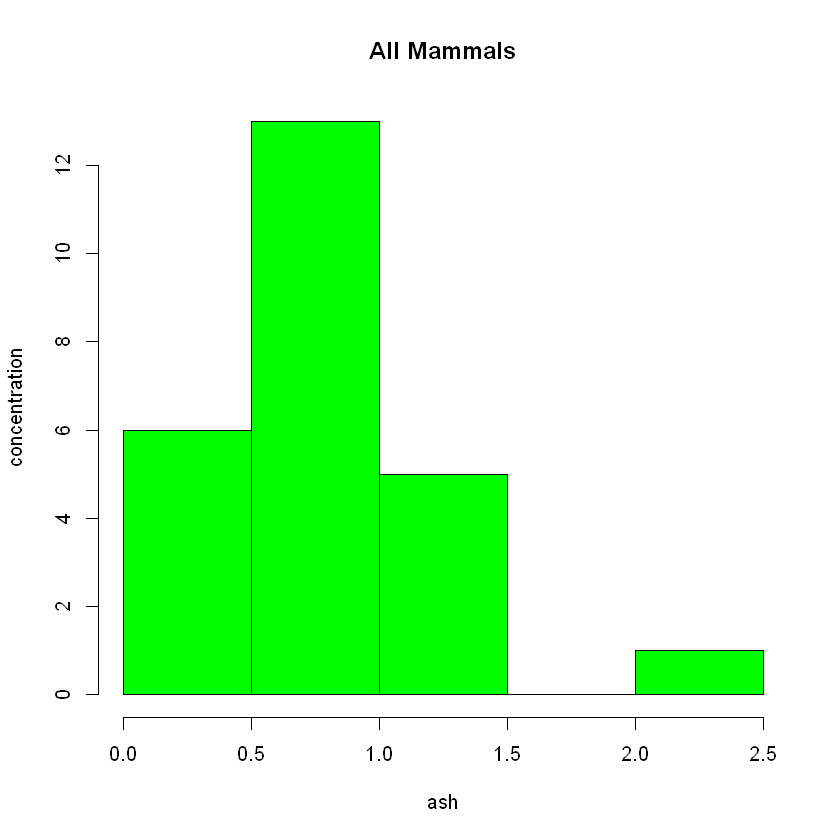

In [24]:
#2.Plot out the distributions (histogram) of each of the variables (columns) and see how they behave.
P1 <- hist(data$water,col = 'brown',xlab='water',ylab='concentration',main = 'All Mammals'  )
P2 <- hist(data$protein,col = 'purple',xlab='protein',ylab='concentration',main = 'All Mammals'  )
P1 <- hist(data$fat,col = 'orange',xlab='fat',ylab='concentration',main = 'All Mammals'  )
P1 <- hist(data$lactose,col = 'blue',xlab='lactose',ylab='concentration',main = 'All Mammals'  )
P1 <- hist(data$ash,col = 'green',xlab='ash',ylab='concentration',main = 'All Mammals'  )

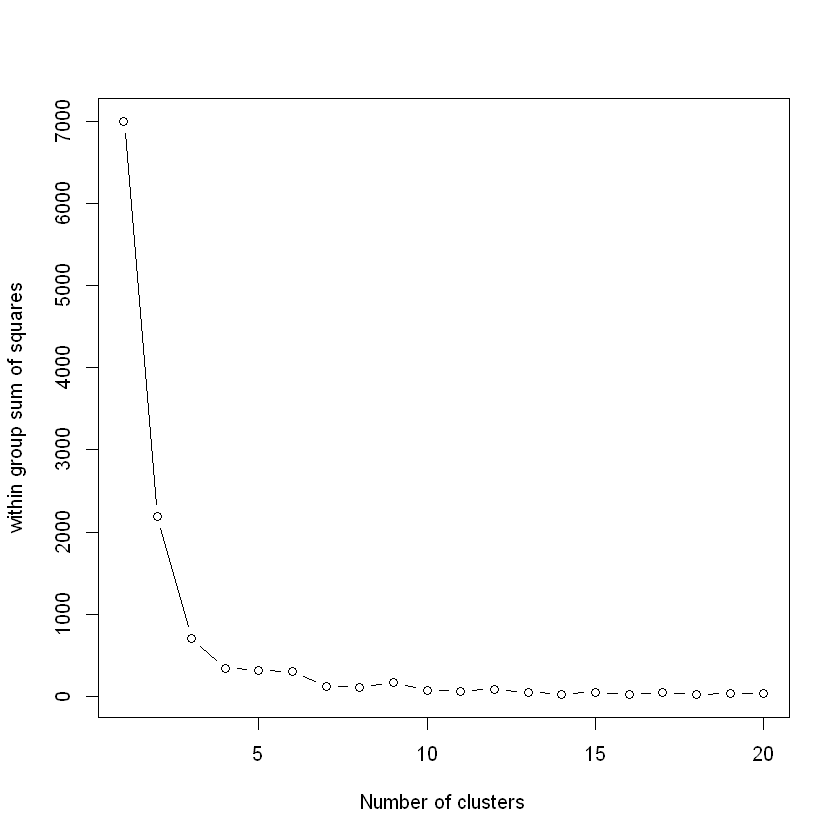

In [32]:
#3.Use k=3, 5, 10, 15, 20. Plot the sum of squares values as a chart and select the appropriate value of K.
WSS <- (nrow(data)-1) * sum(apply(data,2,var))
for (i in 1:20) wss[i] <- sum(kmeans(data,centers = i)$withinss)
plot(1:20,wss,type = "b",xlab = "Number of clusters",
    ylab = "within group sum of squares")
#The appropriate value of K is 3.

### Good Job! You are done with the section!

## Section 2: Clustering: Hierarchal Clustering

### Question 1 
**The dataset is loaded for you. Perform the following tasks:**  
You have data for price. indices from EU stock market. You wish to pair trade the values and would like to find out two correlated indices that you can trade. In order to select a pair, you need to perform heirarchal clustering and select the one with minimum distance.  
1. Compute returns (percent change) of all indices and store in a variable called returns.  
2. Construct correlation matrix using returns and plot out the correlation plot.  
2. Create heirarchal clustering using returns and plot a dendegram diagram to figure out which two of the indices can be used for pairs trading.  

In [1]:
library(datasets)
head(EuStockMarkets)

DAX,SMI,CAC,FTSE
1628.75,1678.1,1772.8,2443.6
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2
1621.04,1684.1,1708.1,2470.4
1618.16,1686.6,1723.1,2484.7
1610.61,1671.6,1714.3,2466.8


In [2]:
df <- EuStockMarkets

In [3]:
df <- na.omit(df)

In [4]:
df <- scale(df)

In [9]:
de <- cor(d)

ERROR: Error in cor(d): supply both 'x' and 'y' or a matrix-like 'x'


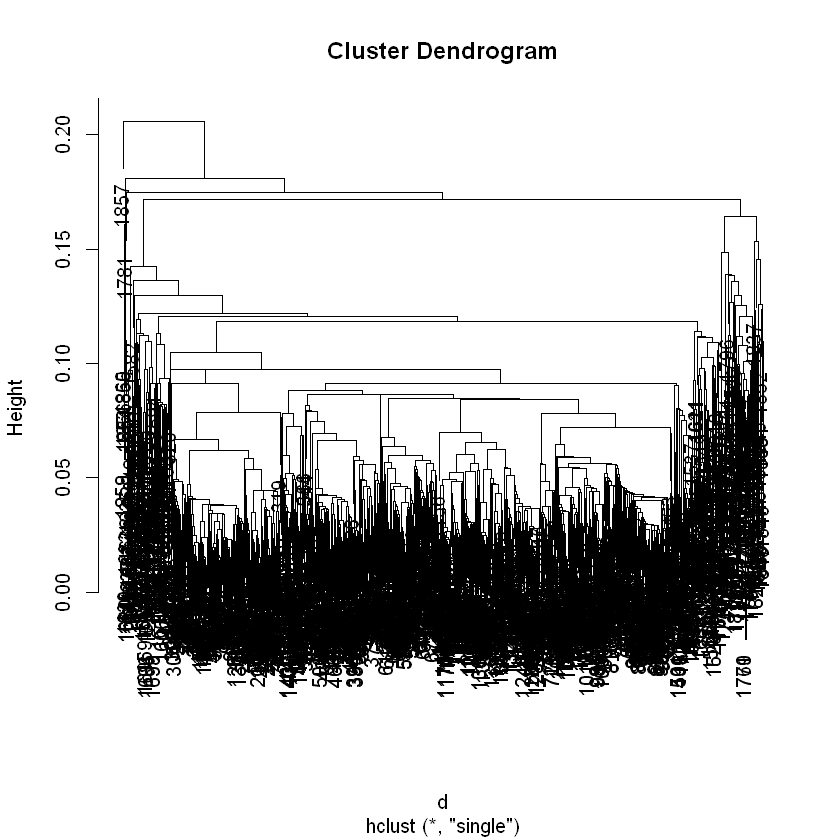

In [8]:
d <- dist(df, method = "euclidean")
 
# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "single" )
 
# Plot the obtained dendrogram
plot(hc1)

In [ ]:
# Compute with agnes
hc2 <- agnes(df, method = "complete")
 

In [21]:
install.packages("cluster")

package 'cluster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Rashida\AppData\Local\Temp\RtmpykDNjt\downloaded_packages


In [22]:
library(cluster)

Warning message:
"package 'cluster' was built under R version 3.6.3"

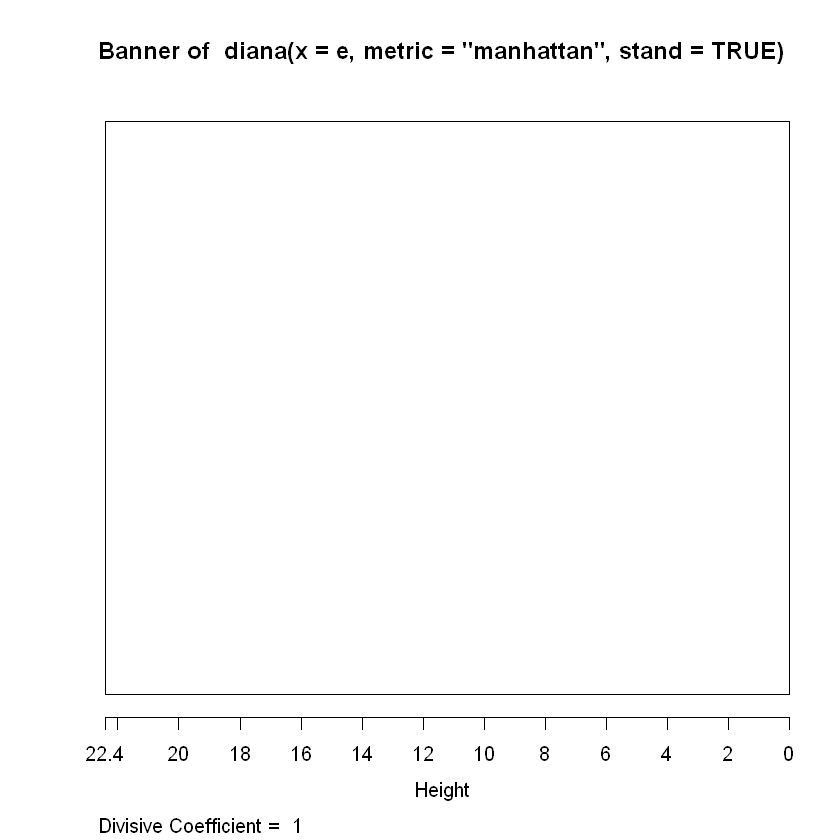

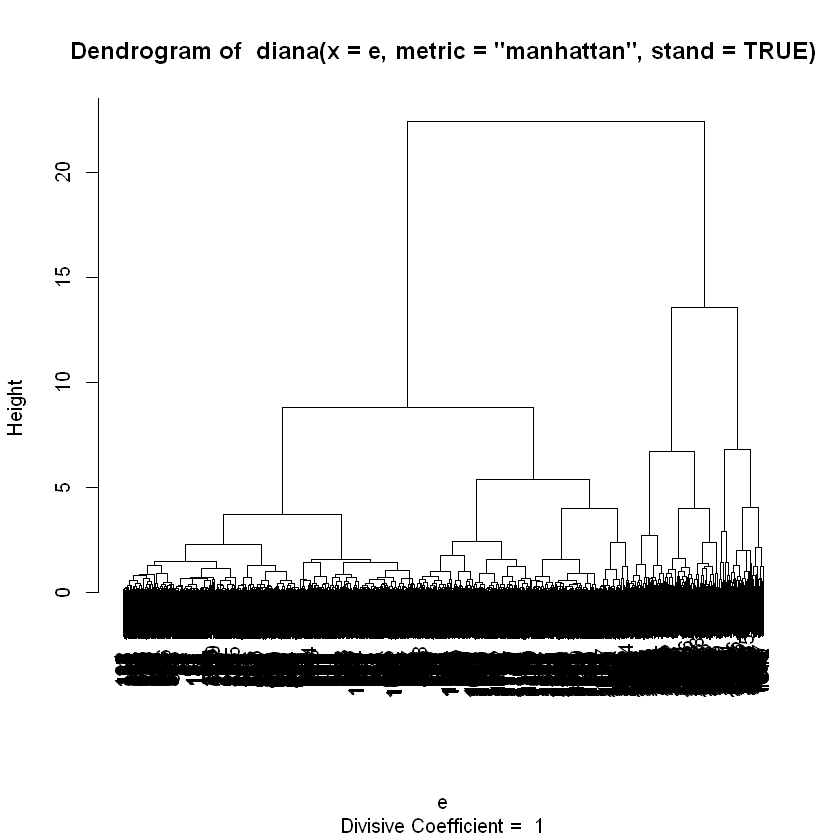

In [28]:
#returns <- diana(e, metric = "manhattan", stand = TRUE)
#print(returns)
#plot(returns)

In [29]:
scale.value.range <- function(x, old, new) {
   # scale value from interval (min/max) 'old' to 'new'
   scale <- (x - old[1]) / (old[2] - old[1])
   newscale <- new[2] - new[1]
   res <- scale * newscale + new[1]
   return(res)
}
float.to.date <- function(x) {
    # convert a float 'x' (e.g. 1998.1) to its Date representation
    year <- as.integer(x)
    # obtaining the month: consider decimals
    float.val <- x - year
    # months: transform from [0,1) value range to [1,12] value range
    mon.float <- scale.value.range(float.val, c(0,1), c(1,12))
    mon <- as.integer(mon.float)
    date <- get.date(year, mon.float, mon)
    return(date)
}
days.in.month <- function(year, mon) {
    # day: transform based on specific month and year (leap years!)
    date1 <- as.Date(paste(year, mon, 1, sep = "-"))
    date2 <- as.Date(paste(year, mon+1, 1, sep = "-"))
    days <- difftime(date2, date1)
    return(as.numeric(days))
}
get.date <- function(year, mon.float, mon) {
    max.nbr.days <- days.in.month(year, mon)
    day.float <- sapply(seq_along(year), function(x) 
        scale.value.range(mon.float[x] - mon[x], c(0,1), c(1,max.nbr.days[x])))
    day <- as.integer(day.float)
    date.rep <- paste(as.character(year), as.character(mon), 
                as.character(day), sep = "-")
    date <- as.Date(date.rep, format = "%Y-%m-%d")
    return(date)
}

mts.to.df <- function(obj) {
    date <- float.to.date(as.numeric(time(obj)))
    df <- cbind("Date" = date, as.data.frame(obj))
    return(df)
}

In [26]:
d <- cor(returns)
 #d

ERROR: Error in cor(returns): supply both 'x' and 'y' or a matrix-like 'x'


In [4]:
devtools::install_github('IRkernel/repr')

ERROR: Error in loadNamespace(name): there is no package called 'devtools'


In [19]:
e <- EuStockMarkets
head(e)

DAX,SMI,CAC,FTSE
1628.75,1678.1,1772.8,2443.6
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2
1621.04,1684.1,1708.1,2470.4
1618.16,1686.6,1723.1,2484.7
1610.61,1671.6,1714.3,2466.8


In [6]:
s <- dist(e)

In [7]:
as.matrix(s)

1,2,3,4,5,6,7,8,9,10,...,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860
0.00000,33.31103,59.32173,70.70908,65.90674,65.81641,58.79133,72.227878,72.460806,70.63788,...,8698.006,8653.998,8376.441,8246.074,8411.676,8110.571,7739.376,7944.509,7866.375,8047.913
33.31103,0.00000,36.72811,44.45299,37.08289,40.60456,36.71164,57.473747,55.680568,56.67299,...,8697.080,8652.953,8375.471,8245.108,8410.747,8109.556,7738.401,7943.761,7865.781,8047.400
59.32173,36.72811,0.00000,28.84824,39.47129,20.62668,49.54198,83.273018,79.832209,81.91706,...,8721.256,8676.964,8399.494,8269.232,8434.988,8133.746,7762.607,7968.083,7890.175,8071.759
70.70908,44.45299,28.84824,0.00000,21.07212,17.78862,33.15017,67.975708,64.051580,67.21460,...,8704.411,8660.241,8382.737,8252.522,8418.274,8116.944,7745.847,7951.502,7873.712,8055.269
65.90674,37.08289,39.47129,21.07212,0.00000,26.07398,17.67479,50.116066,45.154137,52.78042,...,8694.351,8650.306,8372.810,8242.518,8408.182,8106.853,7735.762,7941.424,7863.642,8045.251
65.81641,40.60456,20.62668,17.78862,26.07398,0.00000,37.23654,74.067291,69.098550,76.02058,...,8718.345,8674.227,8396.727,8266.465,8432.171,8130.860,7759.756,7965.372,7887.555,8069.137
58.79133,36.71164,49.54198,33.15017,17.67479,37.23654,0.00000,38.234623,33.562604,42.74423,...,8686.760,8642.859,8365.309,8235.013,8400.635,8099.314,7728.217,7933.834,7856.019,8037.587
72.22788,57.47375,83.27302,67.97571,50.11607,74.06729,38.23462,0.000000,8.675828,18.01717,...,8652.837,8609.051,8331.507,8201.137,8366.674,8065.366,7694.272,7899.868,7822.046,8003.659
72.46081,55.68057,79.83221,64.05158,45.15414,69.09855,33.56260,8.675828,0.000000,25.17372,...,8659.739,8615.978,8338.438,8208.062,8373.587,8072.264,7701.179,7906.814,7829.018,8010.641
70.63788,56.67299,81.91706,67.21460,52.78042,76.02058,42.74423,18.017170,25.173724,0.00000,...,8645.709,8601.766,8324.234,8193.904,8359.515,8058.237,7687.120,7892.653,7814.785,7996.375


In [8]:
d1 <- dist(e, method='manhattan')
as.matrix(d1)

In [9]:
as.matrix(d1)

1,2,3,4,5,6,7,8,9,10,...,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860
0.00,64.42,82.14,105.21,109.89,106.34,89.40,117.12,111.82,127.64,...,16295.03,16149.65,15643.62,15413.77,15750.27,15185.58,14489.23,14879.09,14735.58,15076.77
64.42,0.00,61.52,64.41,58.33,62.72,66.42,96.74,84.64,101.06,...,16305.45,16160.07,15654.04,15424.19,15760.69,15196.00,14499.65,14889.51,14746.00,15087.19
82.14,61.52,0.00,52.13,61.25,33.40,84.74,158.26,146.16,162.58,...,16366.97,16221.59,15715.56,15485.71,15822.21,15257.52,14561.17,14951.03,14807.52,15148.71
105.21,64.41,52.13,0.00,34.68,32.73,54.81,125.93,113.83,130.25,...,16334.64,16189.26,15683.23,15453.38,15789.88,15225.19,14528.84,14918.70,14775.19,15116.38
109.89,58.33,61.25,34.68,0.00,49.25,30.89,97.01,84.91,101.33,...,16305.72,16160.34,15654.31,15424.46,15760.96,15196.27,14499.92,14889.78,14746.27,15087.46
106.34,62.72,33.40,32.73,49.25,0.00,72.74,146.26,134.16,150.58,...,16354.97,16209.59,15703.56,15473.71,15810.21,15245.52,14549.17,14939.03,14795.52,15136.71
89.40,66.42,84.74,54.81,30.89,72.74,0.00,73.52,61.42,77.84,...,16282.23,16136.85,15630.82,15400.97,15737.47,15172.78,14476.43,14866.29,14722.78,15063.97
117.12,96.74,158.26,125.93,97.01,146.26,73.52,0.00,16.30,32.52,...,16208.71,16063.33,15557.30,15327.45,15663.95,15099.26,14402.91,14792.77,14649.26,14990.45
111.82,84.64,146.16,113.83,84.91,134.16,61.42,16.30,0.00,42.62,...,16220.81,16075.43,15569.40,15339.55,15676.05,15111.36,14415.01,14804.87,14661.36,15002.55
127.64,101.06,162.58,130.25,101.33,150.58,77.84,32.52,42.62,0.00,...,16204.39,16059.01,15552.98,15323.13,15659.63,15094.94,14398.59,14788.45,14644.94,14986.13


In [14]:
class(e)  #this will flag those variables that are categorical with an asterix
#new.data <- char2numeric(data)

[1] "mts"    "ts"     "matrix"

In [17]:
str(df)

 Time-Series [1:1860, 1:4] from 1991 to 1999: -0.831 -0.845 -0.852 -0.839 -0.841 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:4] "DAX" "SMI" "CAC" "FTSE"
 - attr(*, "scaled:center")= Named num [1:4] 2531 3376 2228 3566
  ..- attr(*, "names")= chr [1:4] "DAX" "SMI" "CAC" "FTSE"
 - attr(*, "scaled:scale")= Named num [1:4] 1085 1663 580 977
  ..- attr(*, "names")= chr [1:4] "DAX" "SMI" "CAC" "FTSE"


In [12]:
o <- cor(d1)
#o

ERROR: Error in cor(d1): supply both 'x' and 'y' or a matrix-like 'x'


In [38]:
class(EuStockMarkets)

[1] "mts"    "ts"     "matrix"

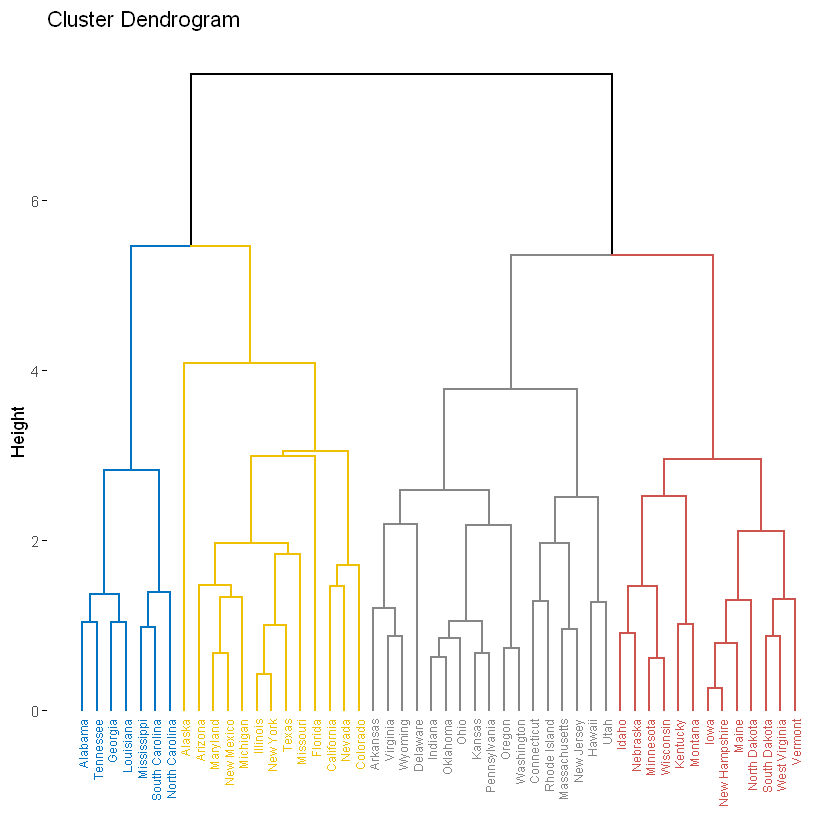

In [40]:
#install.packages("factoextra")
# Compute diana()
#library(cluster)
#res.diana <- diana(USArrests, stand = TRUE)
#library(factoextra)
fviz_dend(res.diana, cex = 0.5,
          k = 4, # Cut in four groups
          palette = "jco" # Color palette
          )

# Plot the dendrogram

In [53]:
returns <- diff(log(df))
#colMeans(eu_pctrtn)

Warning message in log(df):
"NaNs produced"

In [25]:
 d <- cor(returns)
 #d

ERROR: Error in cor(returns): supply both 'x' and 'y' or a matrix-like 'x'


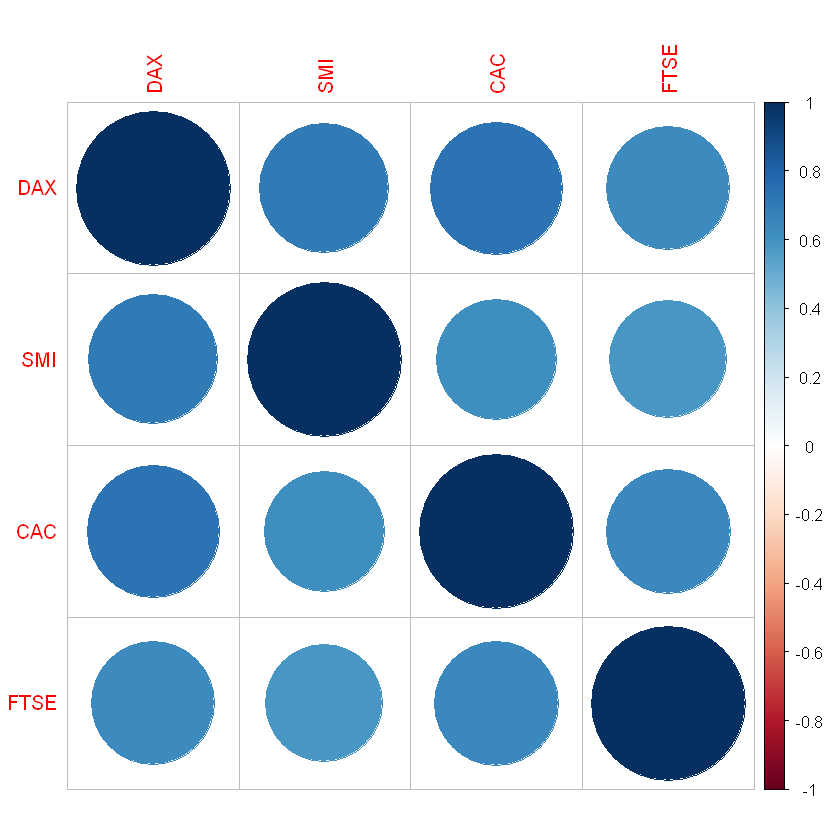

In [48]:
corrplot(d)

In [51]:
hcl <- hclust(returns)

ERROR: Error in if (is.na(n) || n > 65536L) stop("size cannot be NA nor exceed 65536"): missing value where TRUE/FALSE needed


In [23]:
cor_matrix <- cor(r)
cor_matrix

1,2,3,4,5,6,7,8,9,10,...,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860
1.0000000,0.9999526,0.9997960,0.9998102,0.9998660,0.9998031,0.9999211,0.9999434,0.9999452,0.9999419,...,-0.7179989,-0.7201001,-0.7244822,-0.7263647,-0.7228438,-0.7276364,-0.7353627,-0.7320749,-0.7344044,-0.7311671
0.9999526,1.0000000,0.9999356,0.9999380,0.9999683,0.9999399,0.9999792,0.9999109,0.9999316,0.9999108,...,-0.7153318,-0.7174289,-0.7218025,-0.7236813,-0.7201674,-0.7249492,-0.7326616,-0.7293832,-0.7317107,-0.7284800
0.9997960,0.9999356,1.0000000,0.9999854,0.9999717,0.9999963,0.9999269,0.9997386,0.9997796,0.9997447,...,-0.7123490,-0.7144413,-0.7188054,-0.7206801,-0.7171741,-0.7219437,-0.7296407,-0.7263728,-0.7286981,-0.7254748
0.9998102,0.9999380,0.9999854,1.0000000,0.9999897,0.9999950,0.9999577,0.9997987,0.9998342,0.9998060,...,-0.7125777,-0.7146720,-0.7190408,-0.7209176,-0.7174080,-0.7221820,-0.7298877,-0.7266178,-0.7289467,-0.7257201
0.9998660,0.9999683,0.9999717,0.9999897,1.0000000,0.9999844,0.9999856,0.9998672,0.9998972,0.9998699,...,-0.7135991,-0.7156949,-0.7200664,-0.7219444,-0.7184324,-0.7232101,-0.7309201,-0.7276468,-0.7299760,-0.7267472
0.9998031,0.9999399,0.9999963,0.9999950,0.9999844,1.0000000,0.9999444,0.9997693,0.9998087,0.9997741,...,-0.7123698,-0.7144628,-0.7188284,-0.7207038,-0.7171966,-0.7219676,-0.7296674,-0.7263990,-0.7287256,-0.7255012
0.9999211,0.9999792,0.9999269,0.9999577,0.9999856,0.9999444,1.0000000,0.9999361,0.9999556,0.9999389,...,-0.7150971,-0.7171957,-0.7215731,-0.7234537,-0.7199370,-0.7247218,-0.7324418,-0.7291628,-0.7314942,-0.7282609
0.9999434,0.9999109,0.9997386,0.9997987,0.9998672,0.9997693,0.9999361,1.0000000,0.9999975,0.9999971,...,-0.7178871,-0.7199912,-0.7243797,-0.7262651,-0.7227393,-0.7275374,-0.7352761,-0.7319866,-0.7343220,-0.7310802
0.9999452,0.9999316,0.9997796,0.9998342,0.9998972,0.9998087,0.9999556,0.9999975,1.0000000,0.9999935,...,-0.7173014,-0.7194042,-0.7237902,-0.7256745,-0.7221507,-0.7269458,-0.7346802,-0.7313930,-0.7337273,-0.7304875
0.9999419,0.9999108,0.9997447,0.9998060,0.9998699,0.9997741,0.9999389,0.9999971,0.9999935,1.0000000,...,-0.7179472,-0.7200517,-0.7244414,-0.7263273,-0.7228007,-0.7275998,-0.7353407,-0.7320506,-0.7343869,-0.7311444


In [32]:
r <- as.matrix(dist(df,"canberra"))
r

1,2,3,4,5,6,7,8,9,10,...,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860
0.00000000,0.04275440,0.07117654,0.08448823,0.07878610,0.08271198,0.06304927,0.060311388,0.060452036,0.06545529,...,4,4,4,4,4,4,4,4,4,4
0.04275440,0.00000000,0.04511268,0.05251852,0.04214495,0.04615392,0.04025032,0.048744179,0.041685446,0.04731890,...,4,4,4,4,4,4,4,4,4,4
0.07117654,0.04511268,0.00000000,0.02919497,0.03033480,0.01628863,0.04909026,0.093842745,0.086789304,0.09242286,...,4,4,4,4,4,4,4,4,4,4
0.08448823,0.05251852,0.02919497,0.00000000,0.02353288,0.01702171,0.03983368,0.083866635,0.076816054,0.08244833,...,4,4,4,4,4,4,4,4,4,4
0.07878610,0.04214495,0.03033480,0.02353288,0.00000000,0.02539323,0.02094487,0.063521668,0.056467070,0.06209855,...,4,4,4,4,4,4,4,4,4,4
0.08271198,0.04615392,0.01628863,0.01702171,0.02539323,0.00000000,0.04414826,0.088898795,0.081846666,0.08747817,...,4,4,4,4,4,4,4,4,4,4
0.06304927,0.04025032,0.04909026,0.03983368,0.02094487,0.04414826,0.00000000,0.044774353,0.037717260,0.04334943,...,4,4,4,4,4,4,4,4,4,4
0.06031139,0.04874418,0.09384274,0.08386664,0.06352167,0.08889879,0.04477435,0.000000000,0.009047074,0.01549231,...,4,4,4,4,4,4,4,4,4,4
0.06045204,0.04168545,0.08678930,0.07681605,0.05646707,0.08184667,0.03771726,0.009047074,0.000000000,0.01797117,...,4,4,4,4,4,4,4,4,4,4
0.06545529,0.04731890,0.09242286,0.08244833,0.06209855,0.08747817,0.04334943,0.015492307,0.017971169,0.00000000,...,4,4,4,4,4,4,4,4,4,4


In [40]:
d <-stats::dist(df, method = "mahalanobis")
d

ERROR: Error in stats::dist(df, method = "mahalanobis"): invalid distance method


In [16]:
df <- EuStockMarkets
df <- na.omit(df)
df <- scale(df)
#Df <- dist(df,method = "euclidean")
#Df

In [30]:
#eye <- diag(3)
#eye
#Computing the distances:
d <- dist(df)
#The distances in the form of a symmetric matrix:
as.matrix(df)
#Computing Manhattan distances:
#d1 <- as.matrix(dist(df,method = "manhattan"))
#(d1)
#Computing maximum distances:
#dinf <- dist(df,method = "maximum")
#as.matrix(dinf)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,DAX,SMI,CAC,FTSE
1991.496,-0.831409400,-1.021104e+00,-0.7841071201,-1.1487921780
1991.500,-0.845347547,-1.014851e+00,-0.8225345790,-1.1317964415
1991.504,-0.851911012,-1.020804e+00,-0.8785387232,-1.1440825161
1991.508,-0.838516749,-1.017497e+00,-0.8955984471,-1.1213532780
1991.512,-0.841171634,-1.015993e+00,-0.8697503806,-1.1067123725
1991.515,-0.848131489,-1.025013e+00,-0.8849145796,-1.1250391004
1991.519,-0.829565730,-1.018218e+00,-0.8501058500,-1.1034360859
1991.523,-0.820882044,-1.005771e+00,-0.8106444684,-1.0824473751
1991.527,-0.825214669,-1.009439e+00,-0.8165033635,-1.0802973120
1991.531,-0.815609147,-9.981343e-01,-0.8159864022,-1.0937096102


In [ ]:
d <- dist(EuStockMarkets,method= "euclidean")
d

In [ ]:
d <-stats::dist(df, method = "euclidean")
d

In [47]:
library(corrplot)

corrplot 0.90 loaded


In [3]:
EuStockMarkets[is.na(EuStockMarkets)] = 0
#cor_matrix <- cor(Df)
#cor_matrix

In [ ]:
d1 <- dist(df,method = "canberra")
d

## Good Job! You are done with the course!